# Метод Галеркина

In [1]:
import numpy as np
import sympy as sp

In [2]:
x_symbol = sp.Symbol('x')
x = np.linspace(0, 1, 1000)
N = 2 # Кол-во базисных функций. Указываем начальное значение

In [3]:
def galerkin_method(tol=1e-6, init_N=2, max_N=10):
    x = sp.Symbol('x')
    prev_residual = None
    
    for N in range(init_N, max_N + 1):
        phi = [x * (1 - x**i) for i in range(1, N+1)]
        c = sp.symbols(f'c1:{N+1}')
        u_N = sum(c[i] * phi[i] for i in range(N))
        
        residual = sp.diff(u_N, x, x) + u_N + x
        system = [sp.integrate(residual * phi[j], (x, 0, 1)) for j in range(N)]
        solution = sp.solve(system, c)
        
        if solution:
            u_N_solution = u_N.subs(solution)
            residual_expr = sp.simplify(residual.subs(solution))
            
            test_points = np.linspace(0, 1, 10)
            residual_values = [abs(residual_expr.subs(x, p).evalf()) for p in test_points]
            residual_value = max(residual_values)
            
            if prev_residual is not None and abs(prev_residual - residual_value) < tol:
                return u_N_solution, N
            
            prev_residual = residual_value
    
    return u_N_solution

In [4]:
approximated_solution = sp.lambdify(x_symbol, galerkin_method(init_N=N), 'numpy')
solution = (np.sin(x) / np.cos(1)) - x

In [5]:
import matplotlib.pyplot as plot

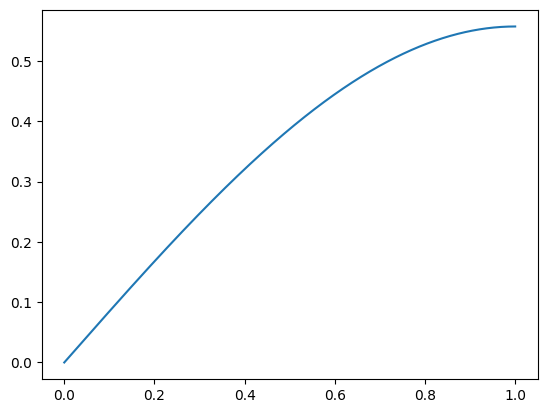

In [6]:
plot.plot(x, solution)
plot.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

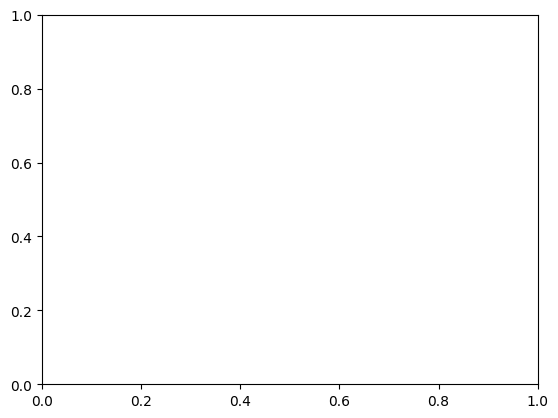

In [7]:
approximated_y = 
plot.plot(x, approximated_solution(x))
plot.show()